In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

%matplotlib inline

plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates = ['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [4]:
w_df = df.groupby(['Date']).sum()
w_df.head()

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,557,30,17
2020-01-23,655,32,18
2020-01-24,941,39,26
2020-01-25,1433,42,42
2020-01-26,2118,56,56


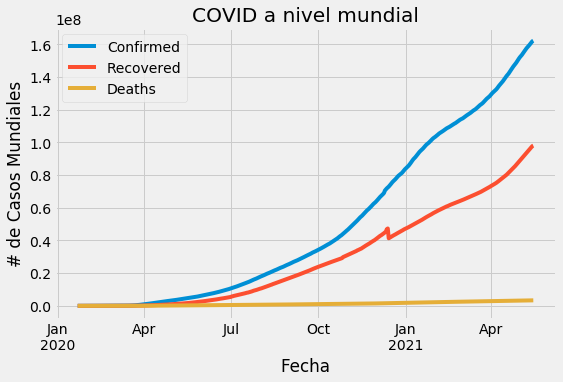

In [6]:
w = w_df.plot(figsize=(8,5))
w.set_xlabel('Fecha')
w.set_ylabel('# de Casos Mundiales')
w.title.set_text('COVID a nivel mundial')

plt.show()

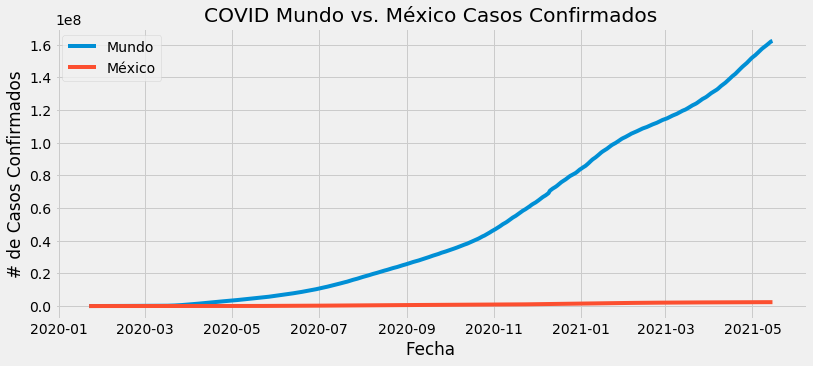

In [13]:
mex_df = df[df['Country']=='Mexico'].groupby(['Date']).sum()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(w_df[['Confirmed']], label='Mundo')
ax.plot(mex_df[['Confirmed']], label='México')

ax.set_xlabel('Fecha')
ax.set_ylabel('# de Casos Confirmados')
ax.title.set_text('COVID Mundo vs. México Casos Confirmados')

plt.legend(loc='upper left')

plt.show()

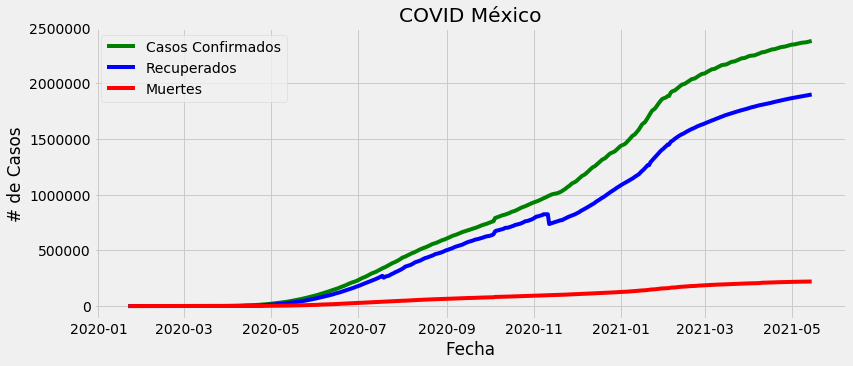

In [12]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111) #Grid de 1 por 1 en el primer subplot

ax.plot(mex_df[['Confirmed']], label='Casos Confirmados', color='g')
ax.plot(mex_df[['Recovered']], label='Recuperados', color='b')
ax.plot(mex_df[['Deaths']], label='Muertes', color='r')

ax.set_xlabel('Fecha')
ax.set_ylabel('# de Casos')
ax.title.set_text('COVID México')

plt.legend(loc='upper left')

plt.show()

/home/manelik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """


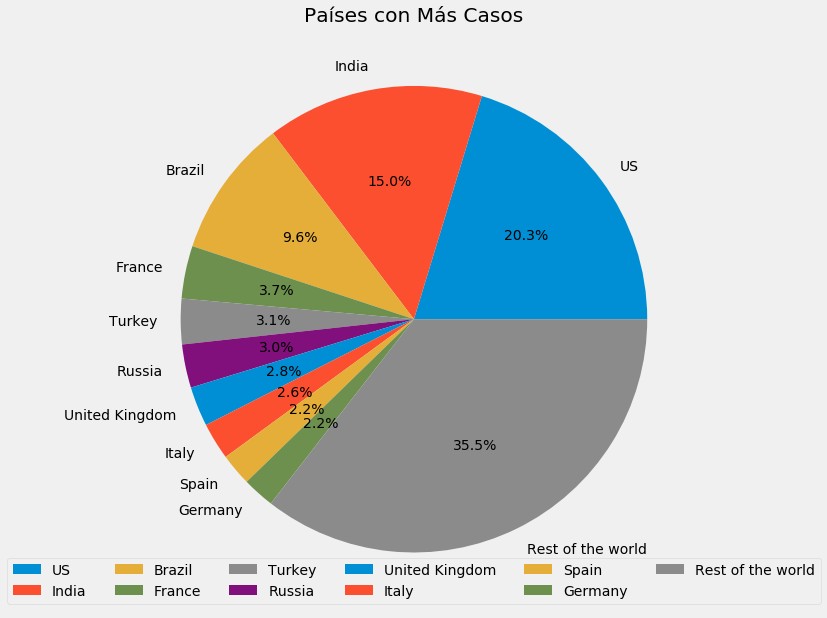

In [20]:
from datetime import date, timedelta
ayer = date.today() - timedelta(days=1)
ayer.strftime('%Y-%m-%d')

hoy_df = df[df['Date']==ayer]
#Top 10
top_10 = hoy_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['Resto del Mundo'] = hoy_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['Resto del Mundo', 'Country'] = 'Rest of the world'
top_10

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels = top_10['Country'], autopct='%1.1f%%')

ax.title.set_text('Países con Más Casos')
plt.legend(loc='lower center', ncol=6)

plt.show()